<a href="https://colab.research.google.com/github/vedanthshenoy/Telecom-Churn-and-Customer-Clustering/blob/main/customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('customerdata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.drop(['customerID','Churn','TotalCharges'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
datas=scale.fit_transform(data)
data_df=pd.DataFrame(datas)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pc=pca.fit_transform(datas)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,-2.158833,-0.129168
1,-1.138407,-1.364239
2,-2.322822,-0.378468
3,0.322194,-1.673078
4,-3.101820,0.407907


In [ ]:
sim_data=pd.read_csv('customerdata.csv')
sim_data=sim_data[['Churn']]
sim_data.head()
# sim_data=pd.DataFrame(le.fit_transform(sim_data),columns=['Churn'])
# sim_data.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
data=pd.concat([pdf,sim_data],axis=1)
data.head()

,principal component 1,principal component 2,Churn
0,-2.158833,-0.129168,No
1,-1.138407,-1.364239,No
2,-2.322822,-0.378468,Yes
3,0.322194,-1.673078,No
4,-3.101820,0.407907,Yes


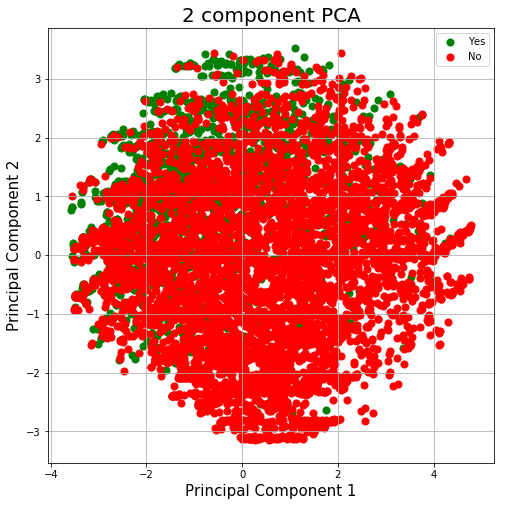

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes','No']
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = data['Churn'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1']
               , data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
data=pd.read_csv('customerdata.csv')
data.drop(['customerID','Churn','TotalCharges'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


For n_clusters = 2, silhouette score is 0.4291682412065322)
For n_clusters = 3, silhouette score is 0.4402793124905602)
For n_clusters = 4, silhouette score is 0.46162586820317336)
For n_clusters = 5, silhouette score is 0.4475209878987202)
For n_clusters = 6, silhouette score is 0.42359346001719855)
For n_clusters = 7, silhouette score is 0.4287389990527263)
For n_clusters = 8, silhouette score is 0.429624838964964)
For n_clusters = 9, silhouette score is 0.42330606387375147)
For n_clusters = 10, silhouette score is 0.41340670351552977)
For n_clusters = 11, silhouette score is 0.4138882278360577)
For n_clusters = 12, silhouette score is 0.4226906541925967)
For n_clusters = 13, silhouette score is 0.4124576428358867)
For n_clusters = 14, silhouette score is 0.4126384268276581)


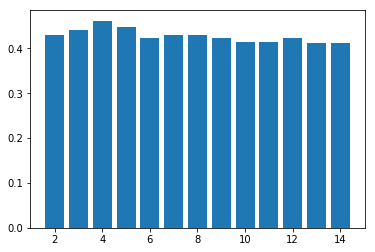

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

le=LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))



scale=StandardScaler()
datas=scale.fit_transform(data)
data_df=pd.DataFrame(datas)

score_list=[]
for n_clusters in range(2,15):
        clusterer = KMeans (n_clusters=n_clusters).fit(data)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.bar(range(2,15),score_list)
plt.show()

In [ ]:
model=KMeans(n_clusters=4)
model.fit(data)
print(model.labels_)

[2 0 2 ... 2 1 3]


In [ ]:
target=pd.DataFrame(model.labels_,columns=['target'])
data=pd.concat([pdf,target],axis=1)
data.head()

,principal component 1,principal component 2,target
0,-2.158833,-0.129168,2
1,-1.138407,-1.364239,0
2,-2.322822,-0.378468,2
3,0.322194,-1.673078,0
4,-3.101820,0.407907,1


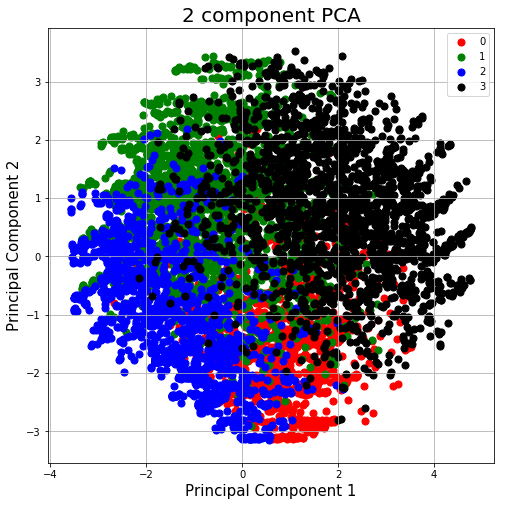

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualizing', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = data['target'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1']
               , data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
# targets=[0,1,2,3]
# colors=['red','green','blue','black']
# for t,c in zip(targets,colors):
#     keep=data['target']==t
#     plt.scatter(data.loc[keep,'principal component 1'],
#                 data.loc[keep,'principal component 2'],c=colors,s=50)
# plt.legend(targets)
# plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

pca=KernelPCA(n_components=2,kernel='rbf')
pc=pca.fit_transform(datas)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,0.098201,-0.130983
1,0.148212,0.052317
2,0.284715,-0.076493
3,-0.093819,-0.019683
4,0.556171,-0.191748


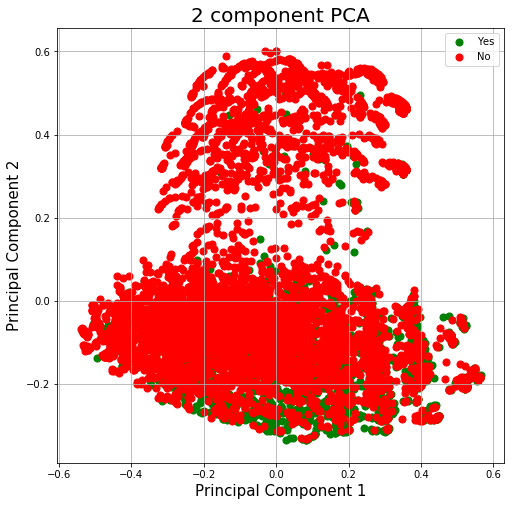

In [ ]:
data=pd.concat([pdf,sim_data],axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes','No']
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = data['Churn'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1']
               , data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
# targets=['Yes','No']
# colors=['red','green']
# for t,c in zip(targets,colors):
#     keep=data['Churn']==t
#     plt.scatter(data.loc[keep,'principal component 1'],
#                 data.loc[keep,'principal component 2'],c=colors,s=50)
# plt.legend(targets)
# plt.show()

In [ ]:
target=pd.DataFrame(model.labels_,columns=['target'])
data=pd.concat([pdf,target],axis=1)
data.head()

,principal component 1,principal component 2,target
0,0.098201,-0.130983,2
1,0.148212,0.052317,0
2,0.284715,-0.076493,2
3,-0.093819,-0.019683,0
4,0.556171,-0.191748,1


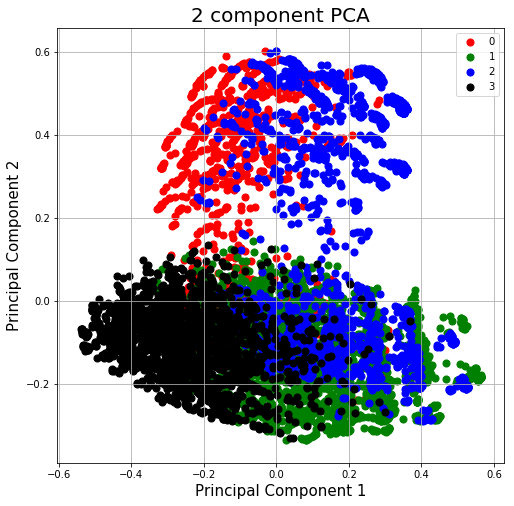

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r','g','b','k']
for target, color in zip(targets,colors):
    indicesToKeep = data['target'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1']
               , data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# targets=[0,1,2,3]
# colors=['red','green','blue','black']
# for t,c in zip(targets,colors):
#     keep=data['target']==t
#     plt.scatter(data.loc[keep,'principal component 1'],
#                 data.loc[keep,'principal component 2'],c=colors,s=50)
# plt.legend(targets)
# plt.show()